### Trabalho prático usando Python
 
### Principal Component Analysis  (PCA)
### Dimensionality Reduction

### Exemplo de aplicação da técnica de PCA

#### Objetivo: Criar uma segmentação de países utilizando os recordes femininos da modalidade esportiva de corridas. Para o desenvolvimento do modelo será utilizada uma base disponível no site da universidade de Wisconsin através do endereço: http://www.stat.wisc.edu/~rich/JWMULT06dat/T1-9.dat.

#### Nesta base temos os recordes femininos internacionais, referência 2005, das seguintes modalidades: 100 metros em segundos, 200 metros em segundos, 400 metros em segundos, 800 metros em minutos, 1.500 metros em minutos, 3.000 metros em minutos e maratona em minutos.

#### Dicionário de variáveis

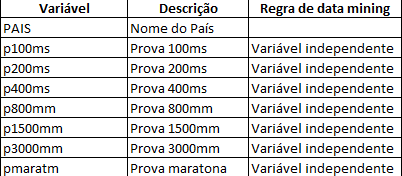

In [1]:
# Importar as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [3]:
# Importar os dados
dados = pd.read_csv(R"Base_Paises.csv", sep=";")

In [4]:
dados.head()

,PAIS,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
0,ARG,11.57,22.94,52.50,2.05,4.25,9.19,150.32
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51
2,AUT,11.15,22.70,50.62,1.94,4.05,8.78,154.35
3,BEL,11.14,22.48,51.45,1.97,4.08,8.82,143.05
4,BER,11.46,23.05,53.30,2.07,4.29,9.81,174.18


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PAIS     54 non-null     object 
 1   p100ms   54 non-null     float64
 2   p200ms   54 non-null     float64
 3   p400ms   54 non-null     float64
 4   p800mm   54 non-null     float64
 5   p1500mm  54 non-null     float64
 6   p3000mm  54 non-null     float64
 7   pmaratm  54 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
p100ms,54.0,11.357778,0.394101,10.49,11.1225,11.325,11.5675,12.52
p200ms,54.0,23.118519,0.929025,21.34,22.5700,22.980,23.6100,25.91
p400ms,54.0,51.989074,2.597202,47.60,49.9675,51.645,53.1175,61.65
p800mm,54.0,2.022407,0.086873,1.89,1.9700,2.005,2.0700,2.29
p1500mm,54.0,4.189444,0.272365,3.84,4.0025,4.100,4.3375,5.42
p3000mm,54.0,9.080741,0.815327,8.10,8.5425,8.845,9.3250,13.12
pmaratm,54.0,153.619259,16.439895,135.25,143.4800,148.430,157.6650,221.14


In [7]:
print(dados)

     PAIS  p100ms  p200ms  p400ms  p800mm  p1500mm  p3000mm  pmaratm
0     ARG   11.57   22.94   52.50    2.05     4.25     9.19   150.32
1     AUS   11.12   22.23   48.63    1.98     4.02     8.63   143.51
2     AUT   11.15   22.70   50.62    1.94     4.05     8.78   154.35
3     BEL   11.14   22.48   51.45    1.97     4.08     8.82   143.05
4     BER   11.46   23.05   53.30    2.07     4.29     9.81   174.18
5     BRA   11.17   22.60   50.62    1.97     4.17     9.04   147.41
6     CAN   10.98   22.62   49.91    1.97     4.00     8.54   148.36
7     CHI   11.65   23.84   53.68    2.00     4.22     9.26   152.23
8     CHN   10.79   22.01   49.81    1.93     3.84     8.10   139.39
9     COL   11.31   22.92   49.64    2.04     4.34     9.37   155.19
10    COK   12.52   25.91   61.65    2.28     4.82    11.10   212.33
11    CRC   11.72   23.92   52.57    2.10     4.52     9.84   164.33
12    CZE   11.09   21.97   47.99    1.89     4.03     8.87   145.19
13    DEN   11.42   23.36   52.92 

In [8]:
dados.isna().sum()

PAIS       0
p100ms     0
p200ms     0
p400ms     0
p800mm     0
p1500mm    0
p3000mm    0
pmaratm    0
dtype: int64

Text(0, 0.5, 'pmaratm')

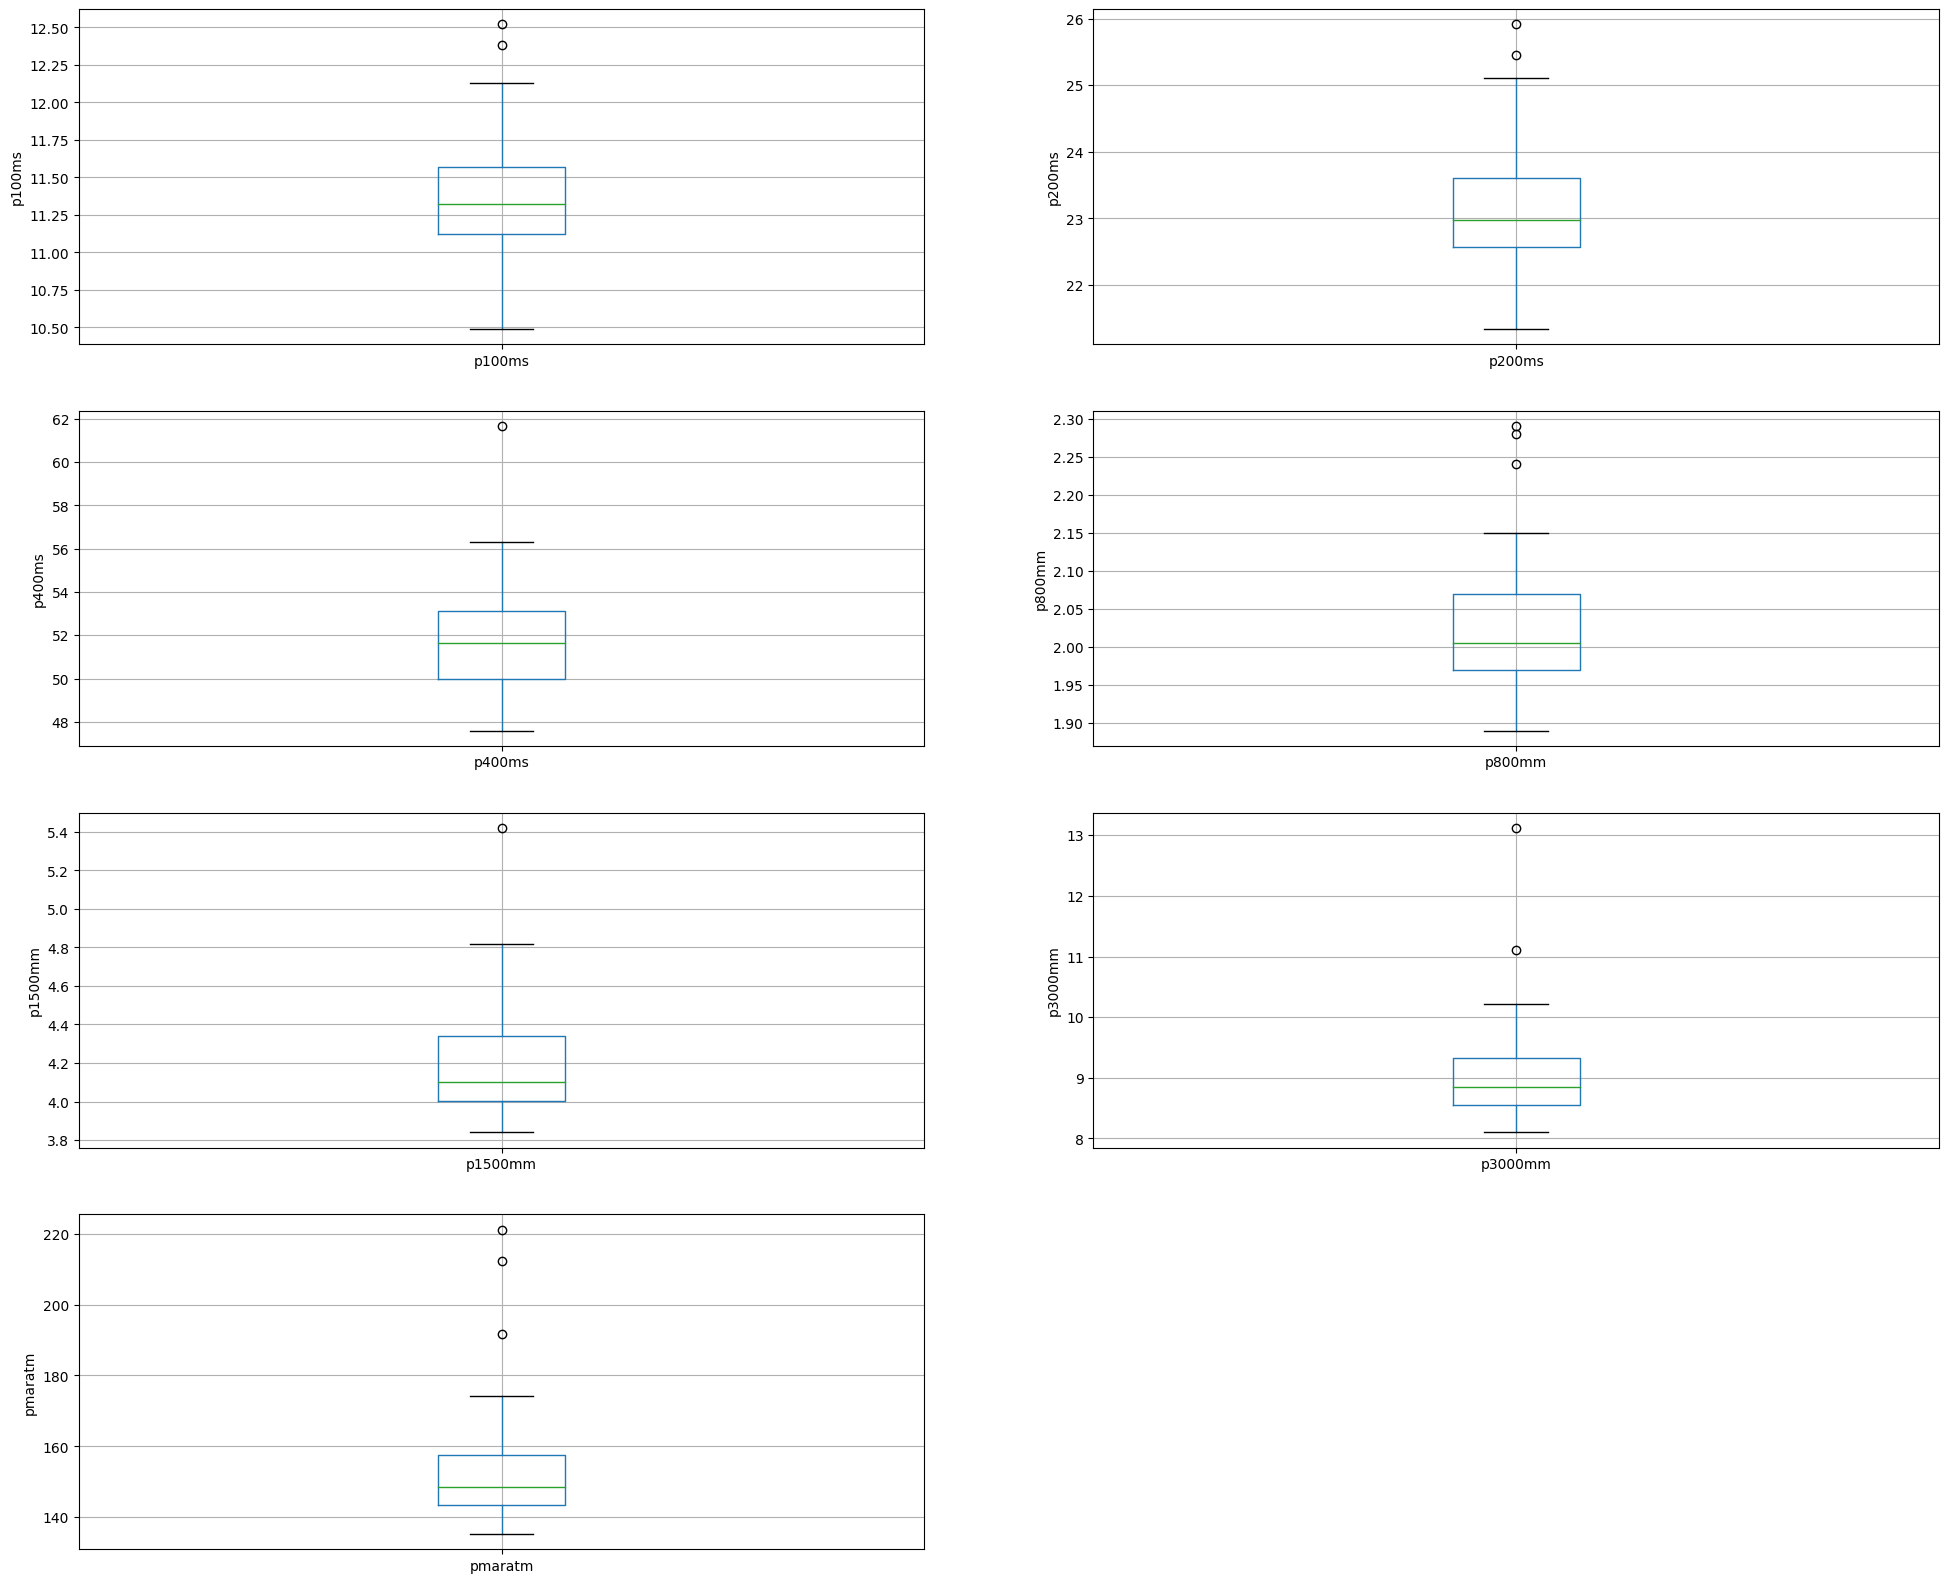

In [9]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados.boxplot(column='p100ms')
fig.set_title('')
fig.set_ylabel('p100ms')


plt.subplot(4, 2, 2)
fig = dados.boxplot(column='p200ms')
fig.set_title('')
fig.set_ylabel('p200ms')


plt.subplot(4, 2, 3)
fig = dados.boxplot(column='p400ms')
fig.set_title('')
fig.set_ylabel('p400ms')

plt.subplot(4, 2, 4)
fig = dados.boxplot(column='p800mm')
fig.set_title('')
fig.set_ylabel('p800mm')

plt.subplot(4, 2, 5)
fig = dados.boxplot(column='p1500mm')
fig.set_title('')
fig.set_ylabel('p1500mm')

plt.subplot(4, 2, 6)
fig = dados.boxplot(column='p3000mm')
fig.set_title('')
fig.set_ylabel('p3000mm')


plt.subplot(4, 2, 7)
fig = dados.boxplot(column='pmaratm')
fig.set_title('')
fig.set_ylabel('pmaratm')


In [10]:
# Excluindo outliers e selecionando somente as variáveis segmentadoras

#aux = dados[dados['pmaratm'] < 180] 
# dados_semout = aux.drop(['PAIS'], axis=1)

dados_semout = dados.drop(['PAIS'], axis=1)

dados_semout.describe()



,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,11.357778,23.118519,51.989074,2.022407,4.189444,9.080741,153.619259
std,0.394101,0.929025,2.597202,0.086873,0.272365,0.815327,16.439895
min,10.490000,21.340000,47.600000,1.890000,3.840000,8.100000,135.250000
25%,11.122500,22.570000,49.967500,1.970000,4.002500,8.542500,143.480000
50%,11.325000,22.980000,51.645000,2.005000,4.100000,8.845000,148.430000
75%,11.567500,23.610000,53.117500,2.070000,4.337500,9.325000,157.665000
max,12.520000,25.910000,61.650000,2.290000,5.420000,13.120000,221.140000


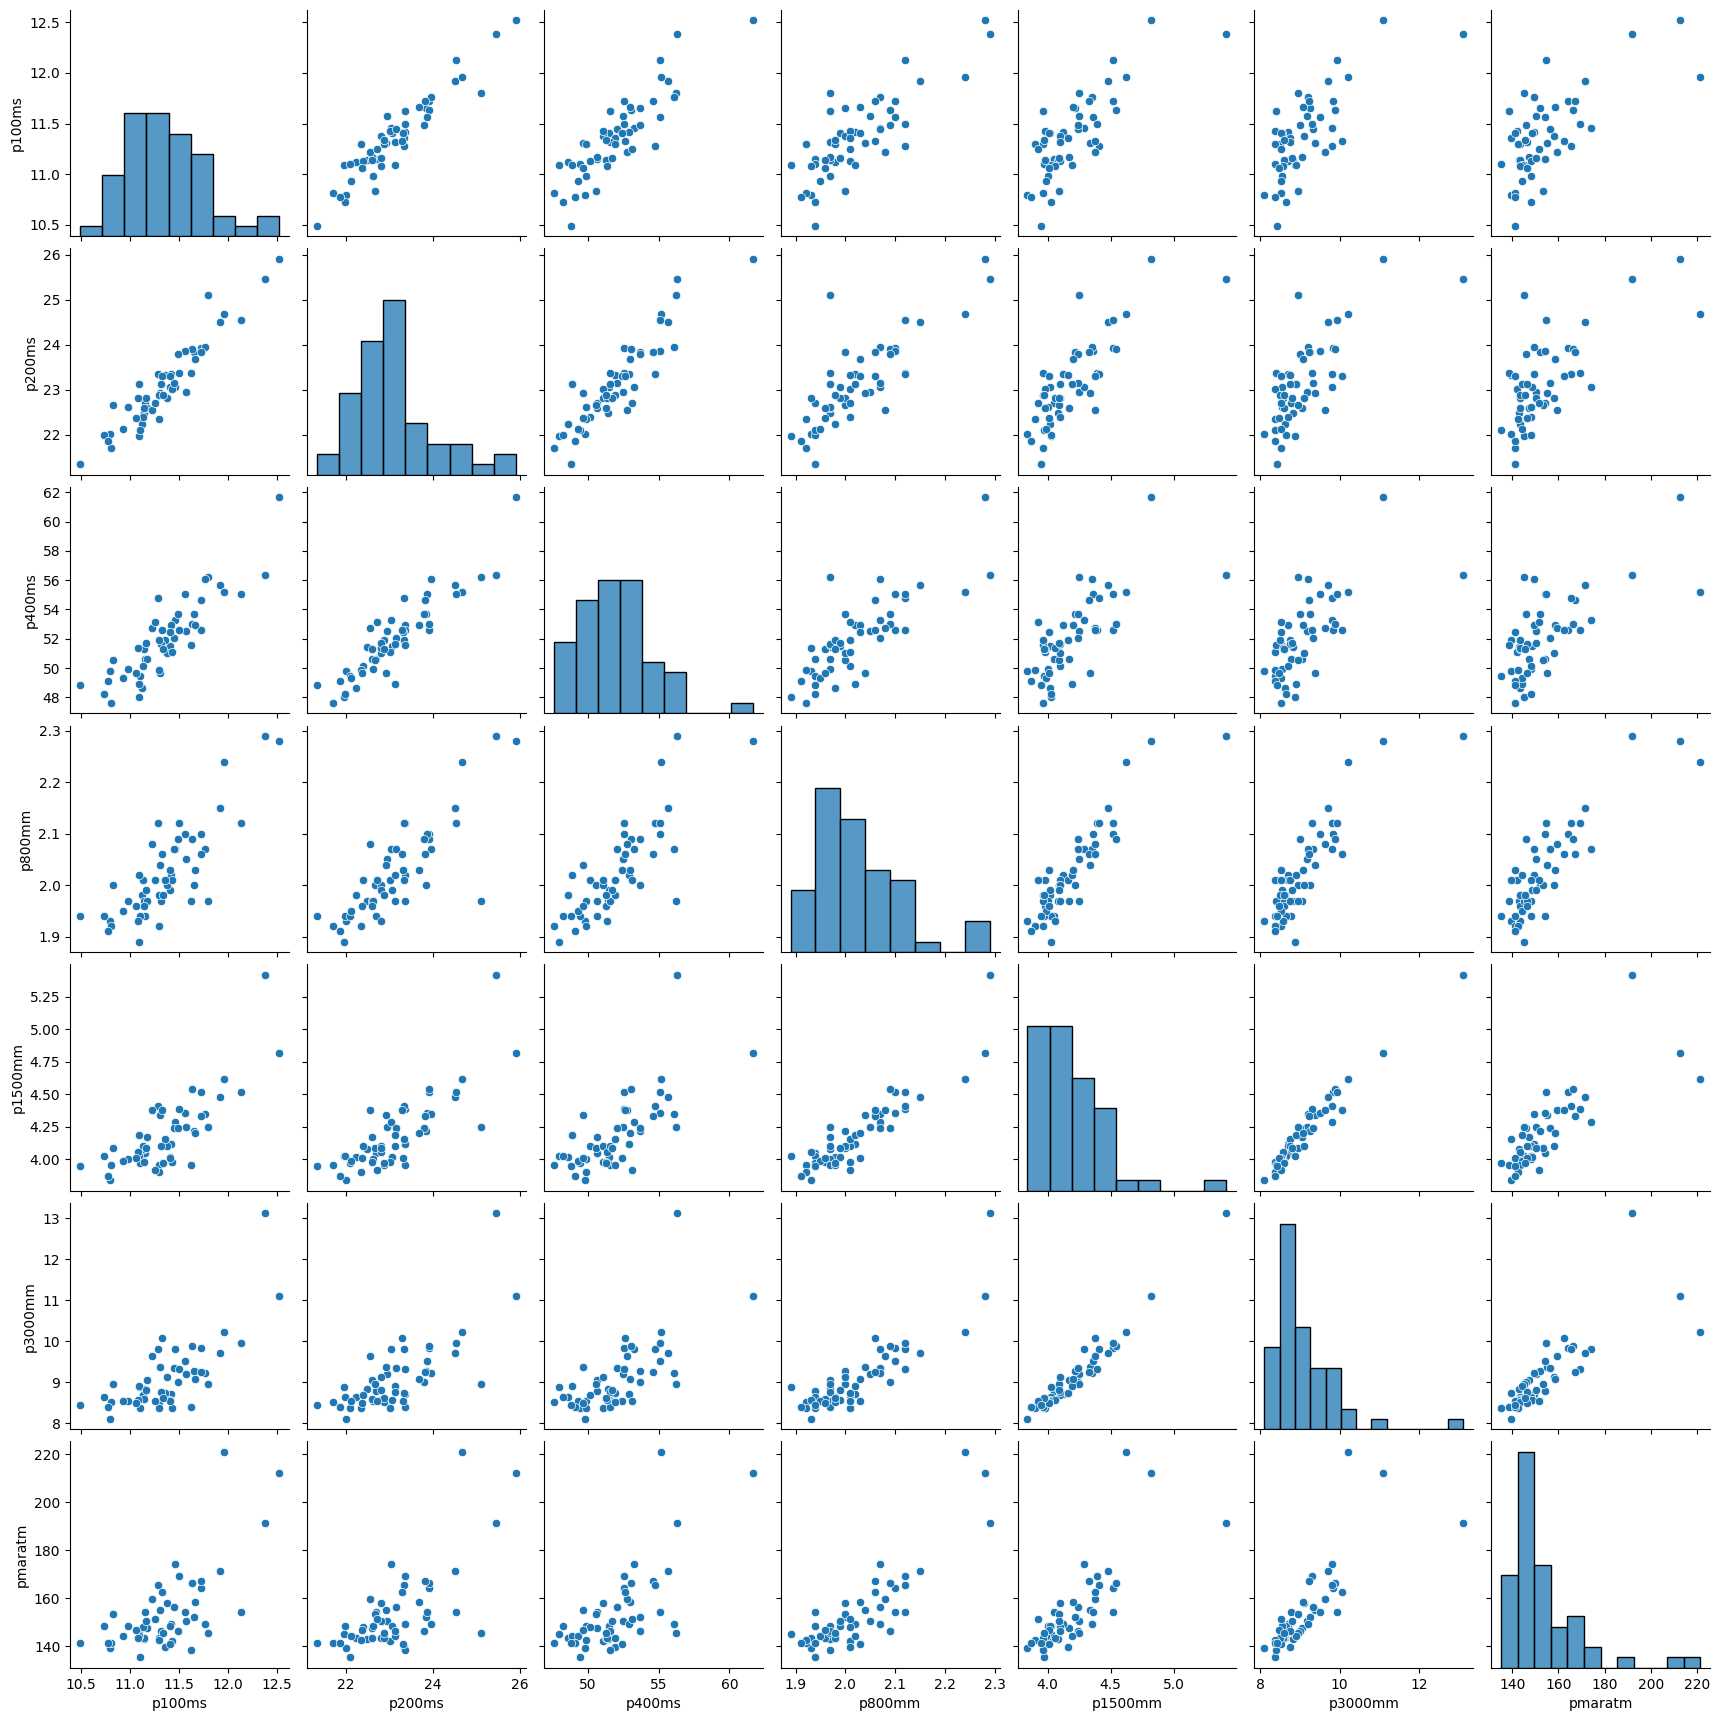

In [11]:
# Análise exploratória dos dados
#sb.pairplot()
sb.pairplot(dados_semout)

In [12]:
# Matriz de Correlação de Pearson
dados_semout.corr(method='pearson')

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
p100ms,1.000000,0.941089,0.870780,0.809176,0.781551,0.727878,0.668960
p200ms,0.941089,1.000000,0.908810,0.819826,0.801328,0.731855,0.679954
p400ms,0.870780,0.908810,1.000000,0.805790,0.719800,0.673799,0.676938
p800mm,0.809176,0.819826,0.805790,1.000000,0.905051,0.866573,0.853990
p1500mm,0.781551,0.801328,0.719800,0.905051,1.000000,0.973380,0.790557
p3000mm,0.727878,0.731855,0.673799,0.866573,0.973380,1.000000,0.798730
pmaratm,0.668960,0.679954,0.676938,0.853990,0.790557,0.798730,1.000000


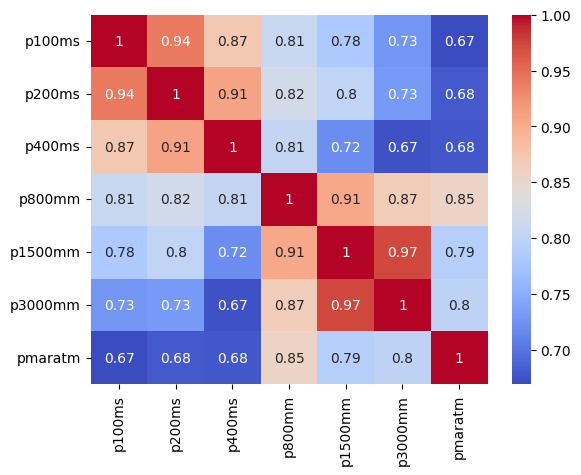

In [13]:
# Matriz de correlação
sb.heatmap(dados_semout.corr(), cmap='coolwarm', annot = True);

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados_semout)

StandardScaler()

In [15]:
scaled_df = scaler.transform(dados_semout)

In [16]:
print(scaled_df)

[[ 5.43553243e-01 -1.93961081e-01  1.98568876e-01  3.20602150e-01
   2.24420025e-01  1.35264999e-01 -2.02570569e-01]
 [-6.09007298e-01 -9.65378910e-01 -1.30548780e+00 -4.92737532e-01
  -6.27964291e-01 -5.58025436e-01 -6.20696416e-01]
 [-5.32169929e-01 -4.54722038e-01 -5.32083979e-01 -9.57503065e-01
  -5.16783728e-01 -3.72322641e-01  4.48666067e-02]
 [-5.57782385e-01 -6.93752914e-01 -2.09508517e-01 -6.08928915e-01
  -4.05603165e-01 -3.22801895e-01 -6.48939866e-01]
 [ 2.61816222e-01 -7.44456433e-02  5.09484984e-01  5.52984916e-01
   3.72660776e-01  9.02836551e-01  1.26240487e+00]
 [-4.80945016e-01 -5.63372436e-01 -5.32083979e-01 -6.08928915e-01
  -7.20614760e-02 -5.04377962e-02 -3.81241085e-01]
 [-9.67581689e-01 -5.41642356e-01 -8.08022025e-01 -6.08928915e-01
  -7.02084666e-01 -6.69447113e-01 -3.22912222e-01]
 [ 7.48452895e-01  7.83892504e-01  6.57170136e-01 -2.60354766e-01
   1.13239462e-01  2.21926303e-01 -8.52988554e-02]
 [-1.45421836e+00 -1.20440979e+00 -8.46886539e-01 -1.07369445e+0

In [17]:
from sklearn.decomposition import PCA

In [18]:
# Pedindo a quantidade de componentes possíveis p variáveis pode ser gerado até p componnetes
pca = PCA(n_components=7)

In [19]:
pca.fit(scaled_df)

PCA(n_components=7)

In [20]:
print('Auto-valores:')
print(pca.explained_variance_)
print()

# a soma dos auto-valores é igual a quantidade de variáveis

Auto-valores:
[5.91720228 0.64055556 0.28460504 0.1269048  0.09268819 0.05554748
 0.01457212]



In [21]:
# Quanto da variância é explicada por cada componente.
print('Variância Explicada:')
print(pca.explained_variance_ratio_)
print()


Variância Explicada:
[0.82966064 0.08981335 0.03990494 0.01779353 0.01299596 0.0077884
 0.00204318]



In [22]:
print('Auto-vetores:')
print(pca.components_)
print()


Auto-vetores:
[[ 0.37776568  0.3832103   0.36803611  0.39478099  0.38926095  0.37609448
   0.35520305]
 [ 0.40717562  0.41362907  0.45935314 -0.16124587 -0.30908771 -0.42318992
  -0.3892153 ]
 [-0.14058027 -0.10078325  0.23702554  0.14754239 -0.42198552 -0.40606271
   0.74106097]
 [-0.58706293 -0.19407501  0.64543118  0.29520804  0.06669044  0.08015699
  -0.3210764 ]
 [-0.16706891  0.09350016  0.32727328 -0.81905467  0.026131    0.35169796
   0.24700821]
 [-0.5396973   0.74493139 -0.24009405  0.01650651  0.18898771 -0.24049968
   0.04826992]
 [ 0.08893934 -0.26565662  0.12660435 -0.19521315  0.73076817 -0.57150644
   0.08208401]]



In [23]:
from pandas import DataFrame

loadings = DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3,TS 4,TS 5,TS 6,TS 7
PC 1,0.377766,0.407176,-0.140580,-0.587063,-0.167069,-0.539697,0.088939
PC 2,0.383210,0.413629,-0.100783,-0.194075,0.093500,0.744931,-0.265657
PC 3,0.368036,0.459353,0.237026,0.645431,0.327273,-0.240094,0.126604
PC 4,0.394781,-0.161246,0.147542,0.295208,-0.819055,0.016507,-0.195213
PC 5,0.389261,-0.309088,-0.421986,0.066690,0.026131,0.188988,0.730768
PC 6,0.376094,-0.423190,-0.406063,0.080157,0.351698,-0.240500,-0.571506
PC 7,0.355203,-0.389215,0.741061,-0.321076,0.247008,0.048270,0.082084


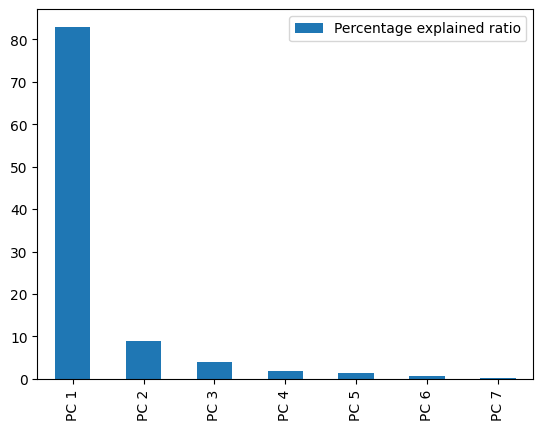

In [24]:
# Gráfico Scree Plot

perc = pca.explained_variance_ratio_ * 100

perc = DataFrame(perc, columns=['Percentage explained ratio'], index=['PC %s' % pc for pc in np.arange(len(perc)) + 1])
ax = perc.plot(kind='bar')

In [25]:
# base padronizada

scaled_df.shape

(54, 7)

In [26]:
scaled_df.round(2)

array([[ 0.54, -0.19,  0.2 ,  0.32,  0.22,  0.14, -0.2 ],
       [-0.61, -0.97, -1.31, -0.49, -0.63, -0.56, -0.62],
       [-0.53, -0.45, -0.53, -0.96, -0.52, -0.37,  0.04],
       [-0.56, -0.69, -0.21, -0.61, -0.41, -0.32, -0.65],
       [ 0.26, -0.07,  0.51,  0.55,  0.37,  0.9 ,  1.26],
       [-0.48, -0.56, -0.53, -0.61, -0.07, -0.05, -0.38],
       [-0.97, -0.54, -0.81, -0.61, -0.7 , -0.67, -0.32],
       [ 0.75,  0.78,  0.66, -0.26,  0.11,  0.22, -0.09],
       [-1.45, -1.2 , -0.85, -1.07, -1.3 , -1.21, -0.87],
       [-0.12, -0.22, -0.91,  0.2 ,  0.56,  0.36,  0.1 ],
       [ 2.98,  3.03,  3.75,  2.99,  2.34,  2.5 ,  3.6 ],
       [ 0.93,  0.87,  0.23,  0.9 ,  1.23,  0.94,  0.66],
       [-0.69, -1.25, -1.55, -1.54, -0.59, -0.26, -0.52],
       [ 0.16,  0.26,  0.36, -0.03, -0.26, -0.46, -0.26],
       [ 0.7 ,  0.86,  0.4 ,  0.79,  1.3 ,  1.  ,  0.79],
       [-0.58, -0.79, -0.72, -0.14, -0.33, -0.48, -0.35],
       [-1.61, -1.23, -1.45, -0.96, -0.59, -0.55, -0.33],
       [-1.4 ,

In [27]:
# Pontuando a base com o PCA

x_pca = pca.transform(scaled_df)

In [28]:
# base pontuada com PCA

x_pca.shape

(54, 7)

In [29]:
# base componentes principais
x_pca.round(2)

array([[ 0.4 ,  0.13, -0.26,  0.03, -0.3 , -0.48,  0.13],
       [-1.95, -0.5 , -0.17, -0.33, -0.38, -0.1 , -0.06],
       [-1.27, -0.19,  0.26, -0.3 ,  0.52,  0.05,  0.03],
       [-1.3 ,  0.  , -0.17,  0.3 ,  0.17, -0.21,  0.06],
       [ 1.41, -0.77,  0.58,  0.04,  0.3 , -0.4 , -0.14],
       [-1.02, -0.38, -0.32, -0.02,  0.24, -0.06,  0.1 ],
       [-1.75, -0.27,  0.24, -0.02,  0.01,  0.32, -0.08],
       [ 0.82,  0.88, -0.27, -0.19,  0.44, -0.02, -0.06],
       [-3.02, -0.05,  0.36,  0.32,  0.06,  0.08, -0.03],
       [ 0.  , -0.95, -0.46, -0.38, -0.3 ,  0.15,  0.1 ],
       [ 7.98,  0.53,  1.28,  0.17,  0.39, -0.18, -0.07],
       [ 2.19, -0.34, -0.44, -0.36, -0.21,  0.15,  0.12],
       [-2.43, -0.77, -0.4 , -0.71,  0.51, -0.29,  0.05],
       [-0.08,  0.72,  0.13,  0.11, -0.09,  0.07,  0.05],
       [ 2.21, -0.44, -0.34, -0.17,  0.03,  0.22,  0.17],
       [-1.28, -0.43,  0.05,  0.04, -0.36, -0.07,  0.1 ],
       [-2.54, -1.13,  0.09, -0.02,  0.17,  0.29,  0.04],
       [-3.08,

# Extraindo e plotando dois componentes

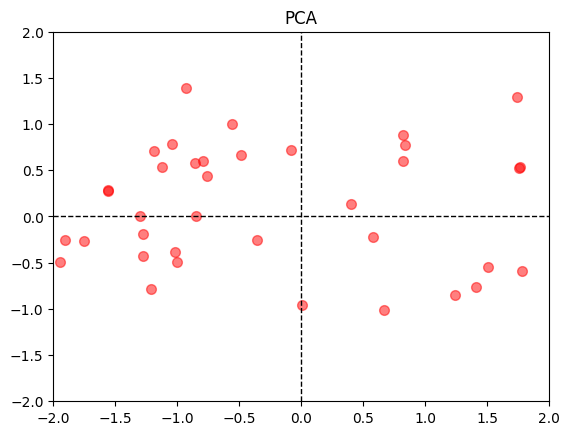

In [30]:
from sklearn.decomposition import PCA

line = dict(linewidth=1, linestyle='--', color='k')
marker = dict(linestyle='none', marker='o', markersize=7, color='red', alpha=0.5)


pca = PCA(n_components=2, copy=True)
X_2 = pca.fit_transform(scaled_df)

fig, ax = plt.subplots()
ax.plot(X_2[:, 0], X_2[:, 1], **marker) 
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(**line)
ax.axvline(**line)
_ = ax.set_title("PCA")

# Selecionando somente 1 componente 

In [31]:
pca_1 = PCA(n_components=1)
 

In [32]:
pca_1.fit(scaled_df)

PCA(n_components=1)

In [33]:
x_pca_1 = pca_1.transform(scaled_df)

In [34]:
# Check the dimensions of data after PCA
x_pca_1.shape

(54, 1)

In [35]:
x_pca_1.round(2)

array([[ 0.4 ],
       [-1.95],
       [-1.27],
       [-1.3 ],
       [ 1.41],
       [-1.02],
       [-1.75],
       [ 0.82],
       [-3.02],
       [ 0.  ],
       [ 7.98],
       [ 2.19],
       [-2.43],
       [-0.08],
       [ 2.21],
       [-1.28],
       [-2.54],
       [-3.08],
       [-2.47],
       [-1.21],
       [ 3.33],
       [-0.8 ],
       [ 1.76],
       [-0.36],
       [-1.05],
       [ 0.58],
       [-1.56],
       [-0.49],
       [-0.93],
       [ 0.84],
       [ 1.47],
       [ 1.74],
       [ 1.51],
       [ 1.77],
       [-1.01],
       [ 0.82],
       [-1.56],
       [-0.76],
       [-0.56],
       [ 5.31],
       [ 1.78],
       [-2.3 ],
       [-1.19],
       [-2.14],
       [-3.07],
       [ 8.29],
       [ 3.12],
       [-1.91],
       [-0.85],
       [-1.12],
       [ 0.67],
       [ 1.24],
       [-0.86],
       [-3.33]])

In [36]:
# Check the values of eigen vectors
# prodeced by principal components

pca_1.components_

array([[0.37776568, 0.3832103 , 0.36803611, 0.39478099, 0.38926095,
        0.37609448, 0.35520305]])

In [37]:
PCA_1 = x_pca_1[:,0]

In [38]:
PCA_1

array([ 3.96932712e-01, -1.94978078e+00, -1.27437528e+00, -1.30385947e+00,
        1.40921784e+00, -1.01623241e+00, -1.75062584e+00,  8.19461265e-01,
       -3.01753763e+00,  1.94577236e-03,  7.98046573e+00,  2.18715760e+00,
       -2.42862265e+00, -8.32701560e-02,  2.21299627e+00, -1.27862579e+00,
       -2.54199265e+00, -3.07613241e+00, -2.46564299e+00, -1.20904762e+00,
        3.32505522e+00, -7.95652644e-01,  1.75829868e+00, -3.57583068e-01,
       -1.04563426e+00,  5.79553038e-01, -1.56198323e+00, -4.86180315e-01,
       -9.26352832e-01,  8.38595689e-01,  1.46901288e+00,  1.73763210e+00,
        1.50924998e+00,  1.76615748e+00, -1.00511641e+00,  8.23643423e-01,
       -1.55926573e+00, -7.62327056e-01, -5.58196096e-01,  5.30681655e+00,
        1.78009305e+00, -2.29511616e+00, -1.18628541e+00, -2.14294047e+00,
       -3.07152112e+00,  8.29053808e+00,  3.12297104e+00, -1.90720408e+00,
       -8.47029079e-01, -1.12400129e+00,  6.65281943e-01,  1.23529643e+00,
       -8.58110393e-01, -

In [39]:
PCA_1.round(2)

array([ 0.4 , -1.95, -1.27, -1.3 ,  1.41, -1.02, -1.75,  0.82, -3.02,
        0.  ,  7.98,  2.19, -2.43, -0.08,  2.21, -1.28, -2.54, -3.08,
       -2.47, -1.21,  3.33, -0.8 ,  1.76, -0.36, -1.05,  0.58, -1.56,
       -0.49, -0.93,  0.84,  1.47,  1.74,  1.51,  1.77, -1.01,  0.82,
       -1.56, -0.76, -0.56,  5.31,  1.78, -2.3 , -1.19, -2.14, -3.07,
        8.29,  3.12, -1.91, -0.85, -1.12,  0.67,  1.24, -0.86, -3.33])

In [40]:
Basefim = DataFrame(PCA_1) 

In [41]:
Basefim.columns = ['PCA_1']

In [42]:
Basefim['PAIS'] =  DataFrame(aux['PAIS'] )

NameError: name 'aux' is not defined

In [ ]:
Basefim['PAIS'] = dados['PAIS'] 

In [ ]:
Basefim 

In [ ]:
Basefim.describe().round()

In [ ]:
#transformando o componenete: Quanto mais rápido maior o indicador
Basefim['PCA_1'] = -Basefim['PCA_1']

In [ ]:
Basefim.describe().round()

In [ ]:
#transformando o indicadoor de Performance:normalização de 0 a 1 e multiplicado por 100

Basefim['IndPerf'] = (Basefim['PCA_1'] - min(Basefim['PCA_1']))/( max(Basefim['PCA_1']) - min(Basefim['PCA_1']) ) *100

In [ ]:
Basefim.describe().round(2)

In [ ]:
Basefim 